In [1]:
import numpy as np
import pandas as pd
import scipy.stats as st
pd.set_option('display.max_columns', None)

import math

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style('whitegrid')

import missingno as msno

from sklearn.preprocessing import StandardScaler
from scipy import stats



import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/videogamesales/vgsales.csv


In [2]:
data = pd.read_csv('/kaggle/input/videogamesales/vgsales.csv')
data.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


# **Overall Sales Analysis:**

1. What is the distribution of global sales across all the games?

2. Which are the top-selling games and platforms based on global sales?

3. How do the sales vary by region (North America, Europe, Japan, Rest of the World)?

4. Is there any correlation between the sales in different regions?

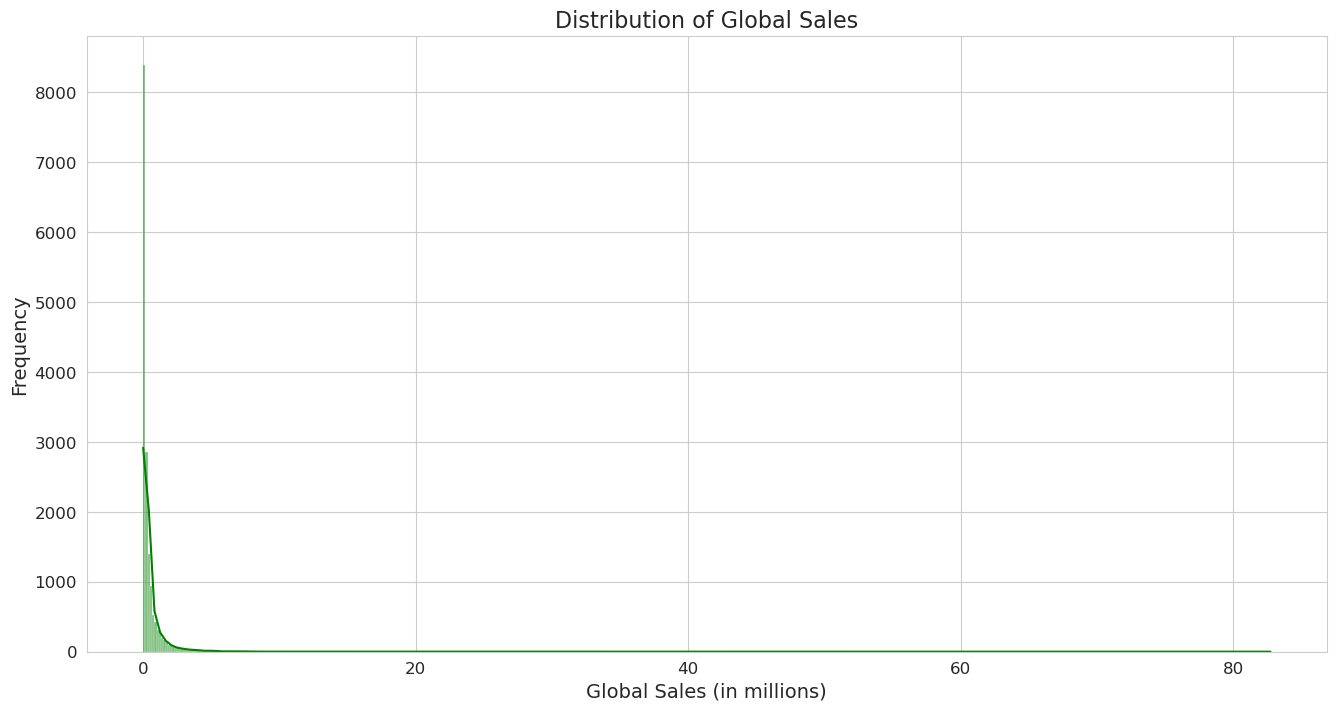

In [3]:
## 1 ----------------------------------------------------------------------
# Distribution of global sales using a larger histogram
plt.figure(figsize=(16, 8))
sns.histplot(data=data, x='Global_Sales', bins=500, kde=True, color="green")
plt.title("Distribution of Global Sales", fontsize=16)
plt.xlabel("Global Sales (in millions)", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.tick_params(axis='both', which='both', labelsize=12)
plt.show()


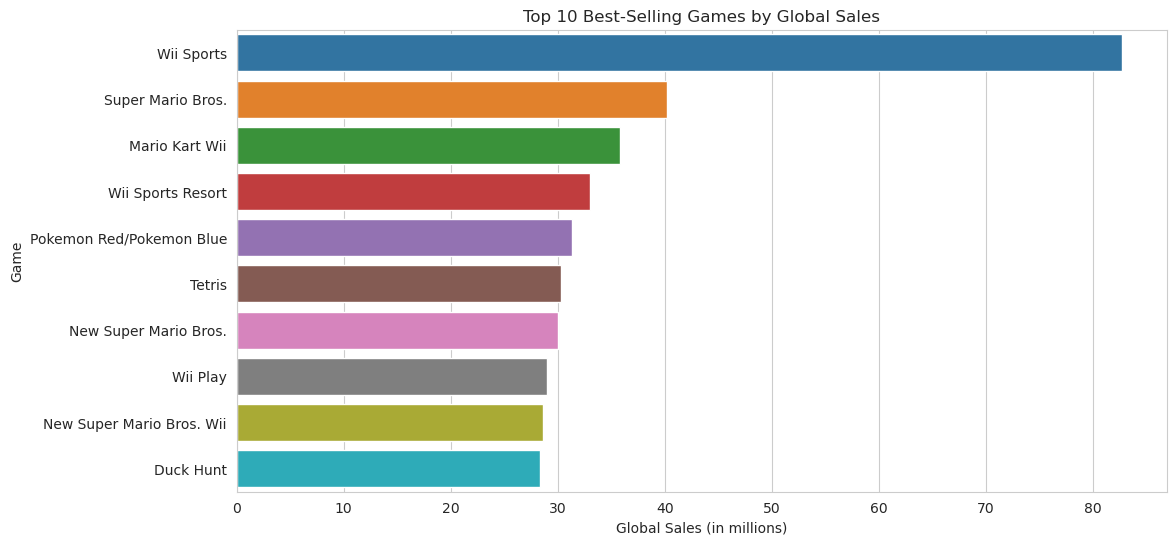

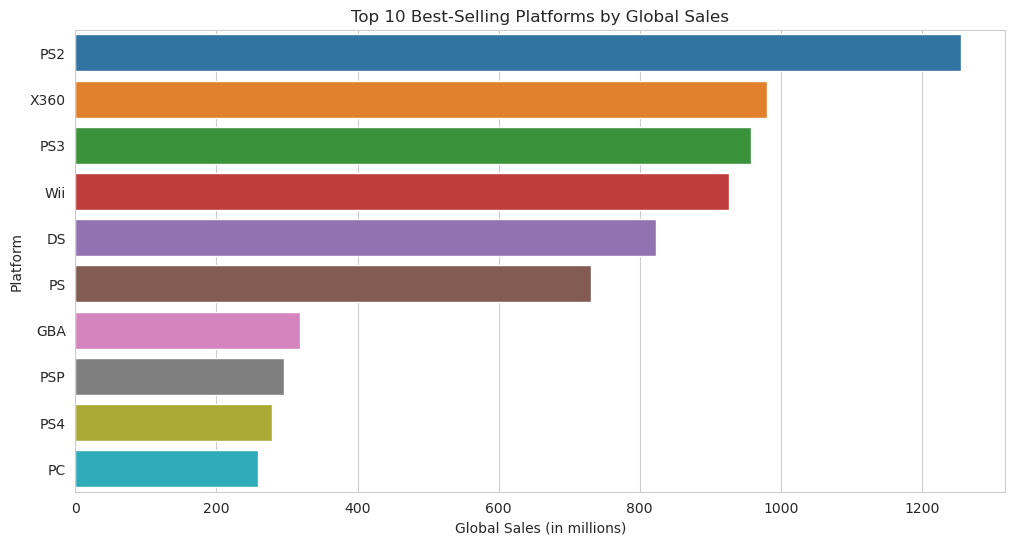

In [4]:
## 2 ------------------------------------------------------------------- 

# Top-selling games based on global sales
top_games = data.sort_values(by='Global_Sales', ascending=False).head(10)

# Bar plot for top-selling games
plt.figure(figsize=(12, 6))
sns.barplot(data=top_games, x='Global_Sales', y='Name')
plt.title("Top 10 Best-Selling Games by Global Sales")
plt.xlabel("Global Sales (in millions)")
plt.ylabel("Game")
plt.show()

# Top-selling platforms based on global sales
top_platforms = data.groupby('Platform')['Global_Sales'].sum().reset_index().sort_values(by='Global_Sales', ascending=False).head(10)

# Bar plot for top-selling platforms
plt.figure(figsize=(12, 6))
sns.barplot(data=top_platforms, x='Global_Sales', y='Platform')
plt.title("Top 10 Best-Selling Platforms by Global Sales")
plt.xlabel("Global Sales (in millions)")
plt.ylabel("Platform")
plt.show()


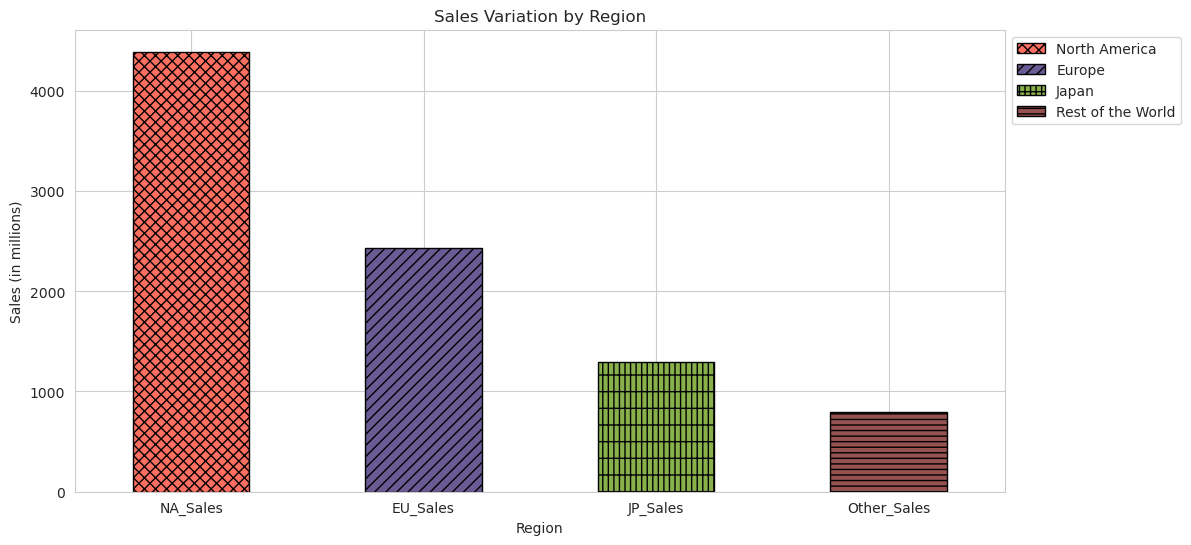

In [5]:
## 3 ---------------------------------------------------------------------------

import matplotlib.patches as mpatches

# Sales variation by region using a stacked bar plot with a creative twist
sales_by_region = data[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()

# Define a custom color palette
colors = ['#FF6F61', '#6B5B95', '#88B04B', '#955251']

# Create a stacked bar plot
plt.figure(figsize=(12, 6))
sales_by_region.plot(kind='bar', stacked=True, color=colors, edgecolor='black')

# Add a decorative touch with hatch patterns
hatch_patterns = ['xxx', '///', '|+|', '---']
for i, patch in enumerate(plt.gca().patches):
    patch.set_hatch(hatch_patterns[i % len(hatch_patterns)])

# Add labels and titles
plt.title("Sales Variation by Region")
plt.xlabel("Region")
plt.ylabel("Sales (in millions)")
plt.xticks(rotation=0)

# Create custom legend patches
legend_labels = ['North America', 'Europe', 'Japan', 'Rest of the World']
legend_patches = [mpatches.Patch(facecolor=colors[i], edgecolor='black', hatch=hatch_patterns[i % len(hatch_patterns)])
                  for i in range(len(legend_labels))]

# Add legend with custom patches
plt.legend(handles=legend_patches, labels=legend_labels, loc='upper left', bbox_to_anchor=(1.0, 1.0))

plt.show()

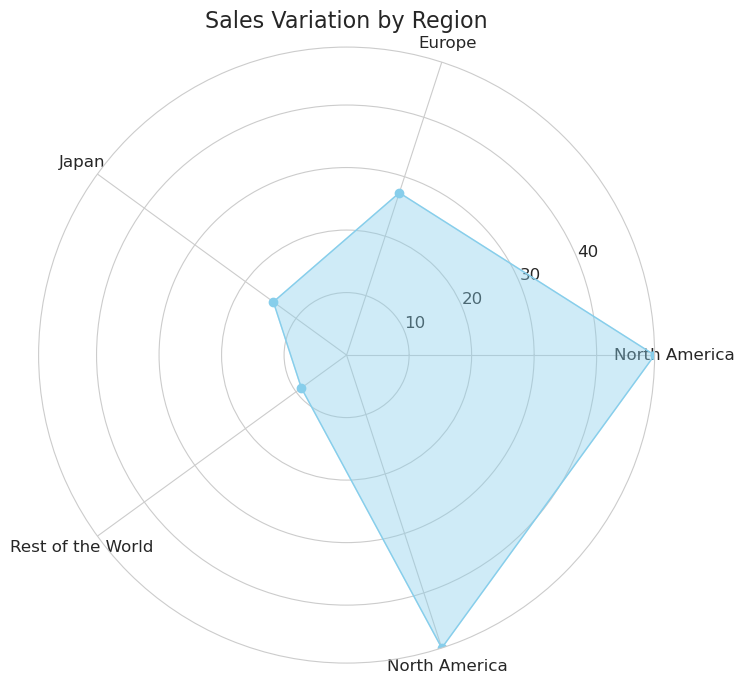

In [6]:
## 3 ----------------------------------------------------------------------------

# Sales variation by region using a radar chart
sales_by_region = data[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()

# Convert sales to percentage of total sales
sales_percent = sales_by_region / sales_by_region.sum() * 100

# Create a list of regions and sales percentages
regions = ['North America', 'Europe', 'Japan', 'Rest of the World']
percentages = sales_percent.tolist()

# Add the first element at the end to close the circular plot
regions.append(regions[0])
percentages.append(percentages[0])

# Create the radar chart
plt.figure(figsize=(8, 8))
angles = np.linspace(0, 2*np.pi, len(regions), endpoint=False).tolist()
angles += angles[:1]
percentages += percentages[:1]
plt.polar(angles, percentages, color='skyblue', linewidth=1, marker='o', markersize=6)
plt.fill(angles, percentages, color='skyblue', alpha=0.4)
plt.title("Sales Variation by Region", fontsize=16)
plt.xticks(angles[:-1], regions, fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(0, max(percentages))
plt.grid(True)
plt.show()


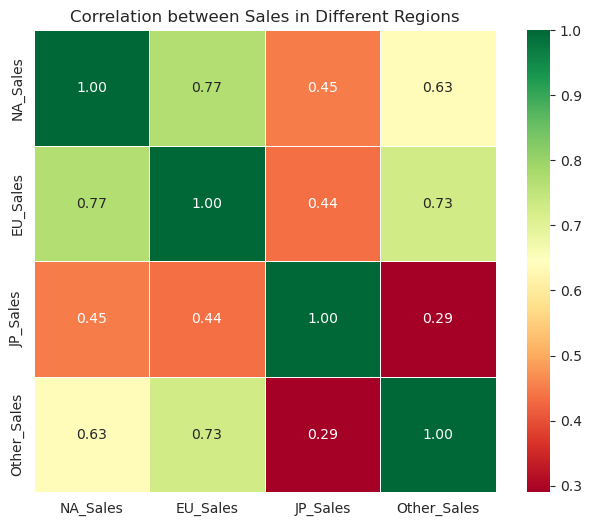

In [7]:
## 4 ----------------------------------------------------------------------------

# Select the sales variables for correlation analysis
sales_variables = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
sales_correlation = data[sales_variables].corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(sales_correlation, annot=True, cmap='RdYlGn', fmt=".2f", square=True, linewidths=0.5)

# Add title
plt.title('Correlation between Sales in Different Regions')

plt.show()

# **Platform Analysis:**

1. Which platforms have the highest number of games and sales?
2. How does the average sales per game vary across different platforms?
3. Is there a correlation between the number of games and sales on a platform?

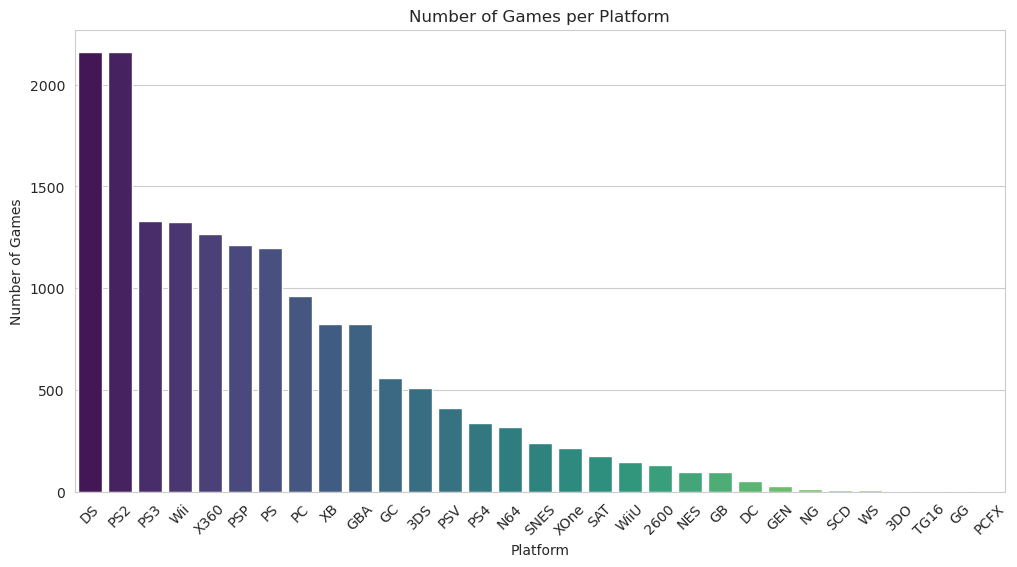

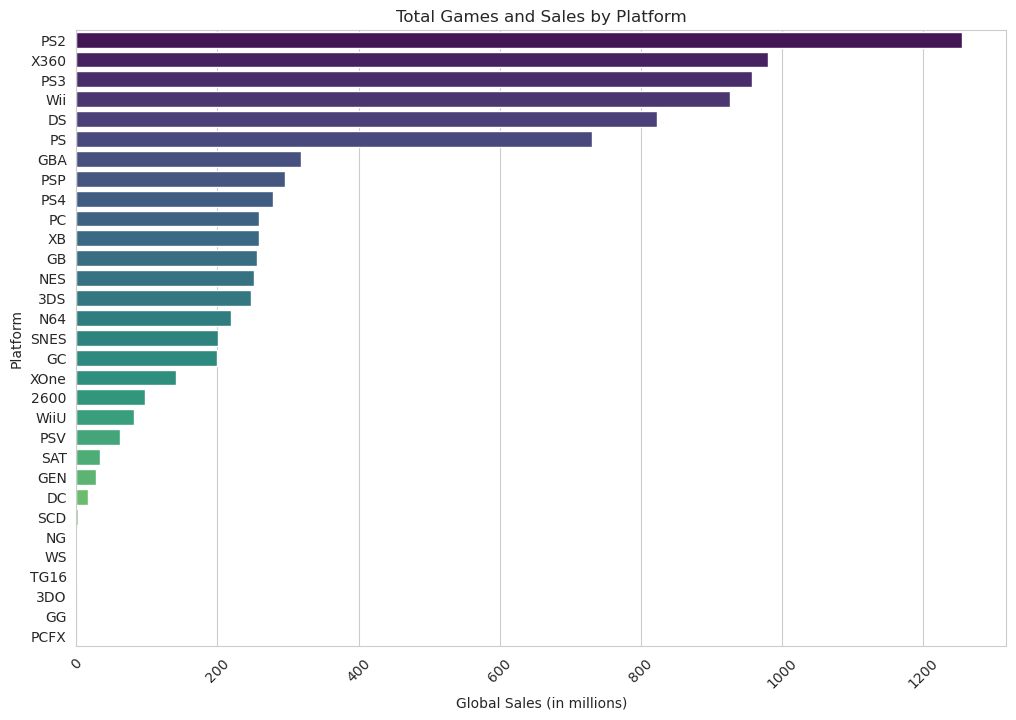

In [8]:
## 1 -------------------------------------------------------------------------

# Count the number of games per platform
platform_counts = data['Platform'].value_counts().sort_values(ascending=False)

# Plotting the number of games per platform
plt.figure(figsize=(12, 6))
sns.barplot(x=platform_counts.index, y=platform_counts.values, palette='viridis')
plt.title("Number of Games per Platform")
plt.xlabel("Platform")
plt.ylabel("Number of Games")
plt.xticks(rotation=45)
plt.show()

# Grouping the data by platform and calculating total games and sales
platform_stats = data.groupby('Platform').agg({'Name': 'count', 'Global_Sales': 'sum'}).reset_index()
platform_stats = platform_stats.sort_values('Global_Sales', ascending=False)

# Creating the bar plot
plt.figure(figsize=(12, 8))
sns.barplot(data=platform_stats, x='Global_Sales', y='Platform', palette='viridis')
plt.title("Total Games and Sales by Platform")
plt.xlabel("Global Sales (in millions)")
plt.ylabel("Platform")
plt.xticks(rotation=45)
plt.show()



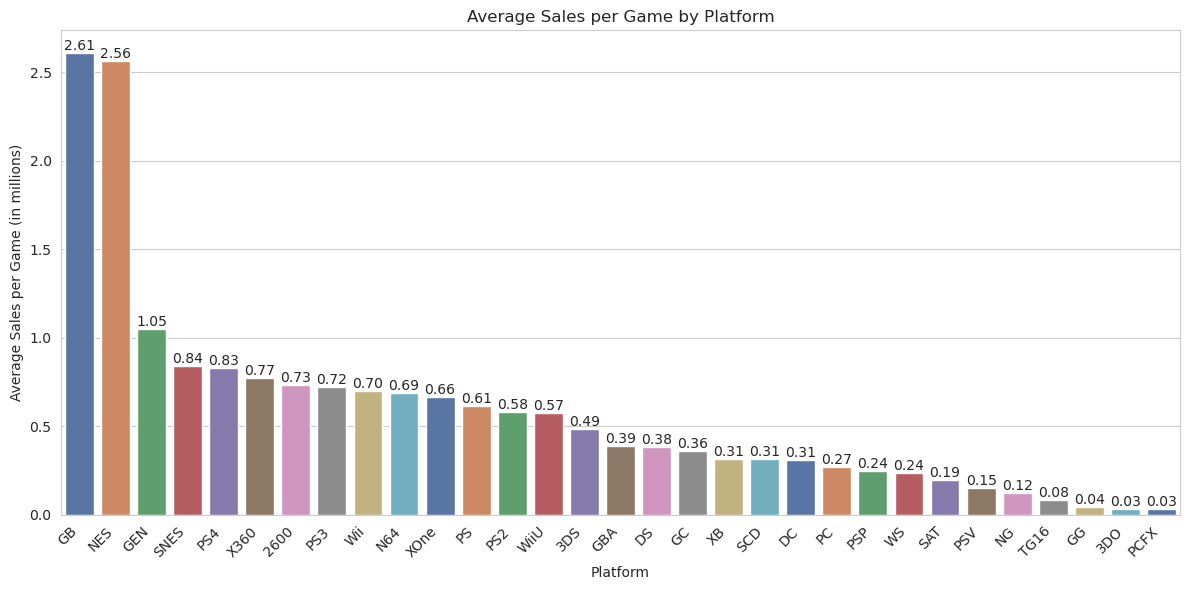

In [9]:
## 2 -------------------------------------------------------------------------------------------

# Calculate average sales per game for each platform
avg_sales_per_game = data.groupby('Platform')['Global_Sales'].mean().sort_values(ascending=False)

# Generate a color palette for the platforms
platform_colors = sns.color_palette('deep', n_colors=len(avg_sales_per_game))

# Create a bar plot with color encoding
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(x=avg_sales_per_game.index, y=avg_sales_per_game, palette=platform_colors)
plt.title("Average Sales per Game by Platform")
plt.xlabel("Platform")
plt.ylabel("Average Sales per Game (in millions)")
plt.xticks(rotation=45, ha='right')

# Add data labels to the bars
for index, value in enumerate(avg_sales_per_game):
    bar_plot.text(index, value, f'{value:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

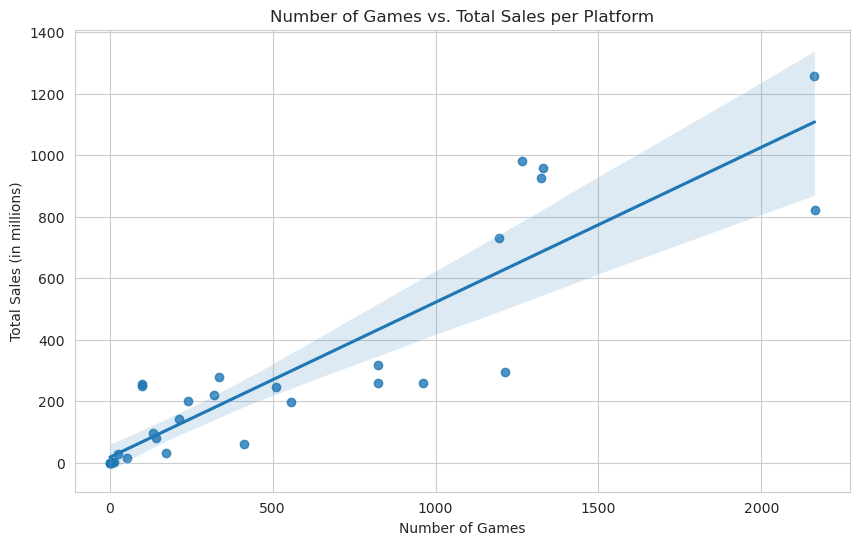

In [10]:
## 3 ------------------------------------------------------------------------------------

# Calculate the total number of games per platform
num_games = data['Platform'].value_counts()

# Calculate the total sales per platform
total_sales = data.groupby('Platform')['Global_Sales'].sum()

# Create a DataFrame with the number of games and total sales per platform
platform_stats = pd.DataFrame({'Number of Games': num_games, 'Total Sales (in millions)': total_sales})

# Create a scatter plot with a regression line
plt.figure(figsize=(10, 6))
sns.regplot(data=platform_stats, x='Number of Games', y='Total Sales (in millions)')
plt.title("Number of Games vs. Total Sales per Platform")
plt.xlabel("Number of Games")
plt.ylabel("Total Sales (in millions)")
plt.grid(True)
plt.show()


# **Genre Analysis:**

1. What are the most popular genres based on the number of games and sales?
2. How do the sales of different genres compare across regions?
3. Are certain genres more successful on specific platforms?

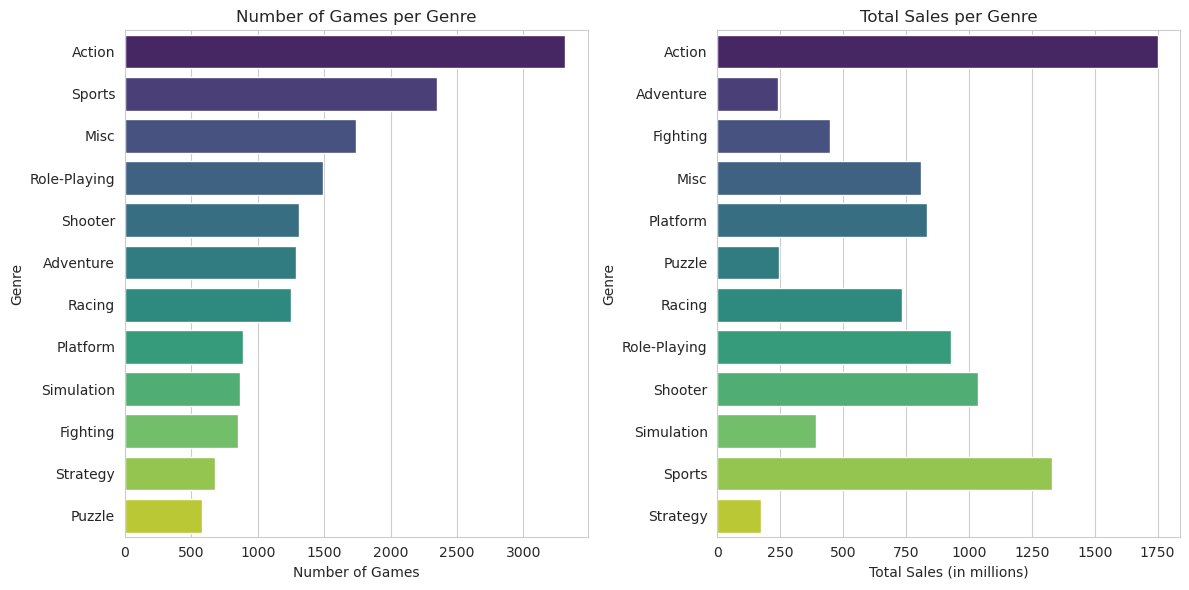

In [11]:
# Calculate the count and total sales per genre
genre_counts = data['Genre'].value_counts()
genre_sales = data.groupby('Genre')['Global_Sales'].sum()

# Sort the genres based on count and sales
sorted_genres_by_count = genre_counts.index
sorted_genres_by_sales = genre_sales.index

# Create bar plots for genre count and sales
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.barplot(x=genre_counts, y=sorted_genres_by_count, palette='viridis')
plt.title("Number of Games per Genre")
plt.xlabel("Number of Games")
plt.ylabel("Genre")

plt.subplot(1, 2, 2)
sns.barplot(x=genre_sales, y=sorted_genres_by_sales, palette='viridis')
plt.title("Total Sales per Genre")
plt.xlabel("Total Sales (in millions)")
plt.ylabel("Genre")

plt.tight_layout()
plt.show()


<Figure size 1200x600 with 0 Axes>

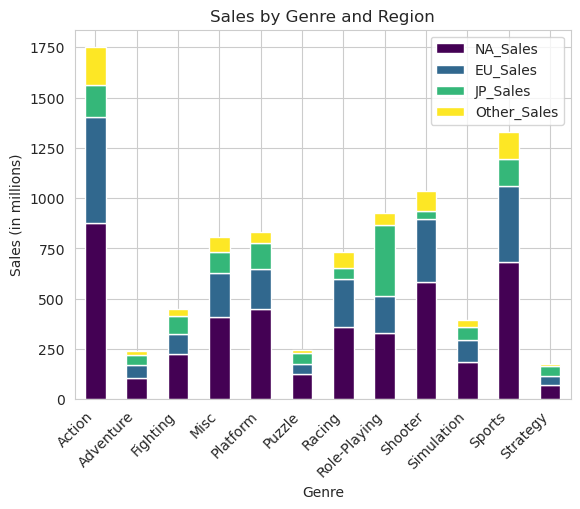

In [12]:
# Select the relevant columns for genre and regional sales
genre_sales = data[['Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]

# Group the data by genre and calculate the sum of sales for each region
genre_sales_by_region = genre_sales.groupby('Genre').sum()

# Plot stacked bar plots for sales by genre and region
plt.figure(figsize=(12, 6))
genre_sales_by_region.plot(kind='bar', stacked=True, cmap='viridis')

plt.title("Sales by Genre and Region")
plt.xlabel("Genre")
plt.ylabel("Sales (in millions)")
plt.xticks(rotation=45, ha='right')
plt.legend(loc='upper right')
plt.show()


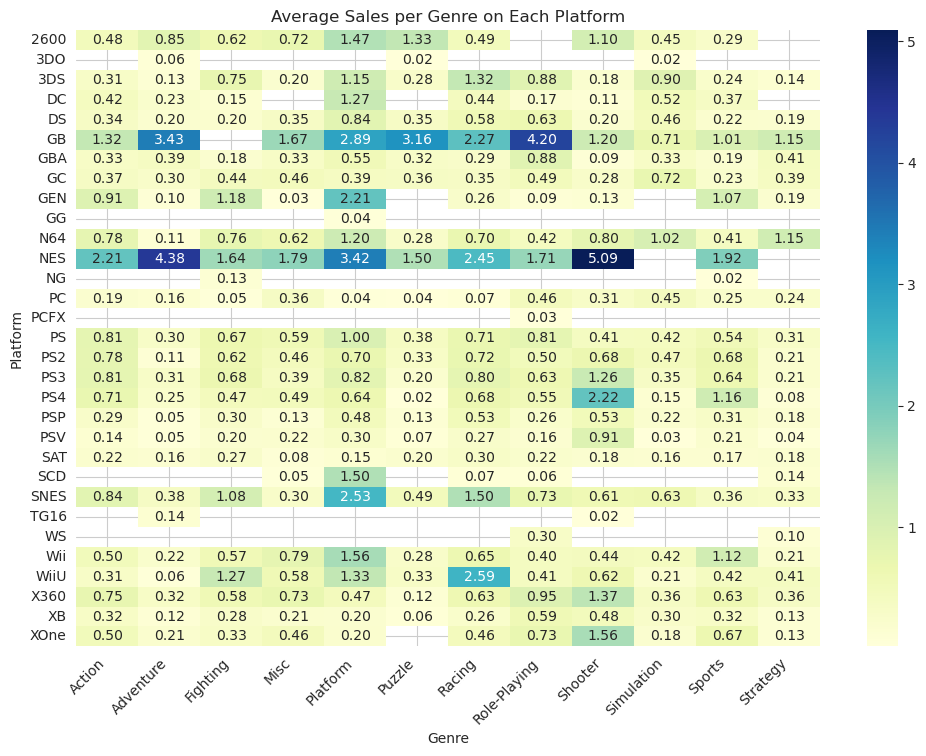

In [13]:
# Calculate the average sales per genre on each platform
avg_sales_per_genre_platform = data.groupby(['Platform', 'Genre'])['Global_Sales'].mean().unstack()

# Create a heatmap to visualize the average sales per genre on each platform
plt.figure(figsize=(12, 8))
sns.heatmap(avg_sales_per_genre_platform, cmap='YlGnBu', annot=True, fmt=".2f", cbar=True)
plt.title("Average Sales per Genre on Each Platform")
plt.xlabel("Genre")
plt.ylabel("Platform")
plt.xticks(rotation=45, ha='right')
plt.show()


# **Time Analysis:**

1. How have video game sales evolved over time?
2. Are there any noticeable trends or patterns in sales by year?
3. Which platforms and genres have dominated different time periods?

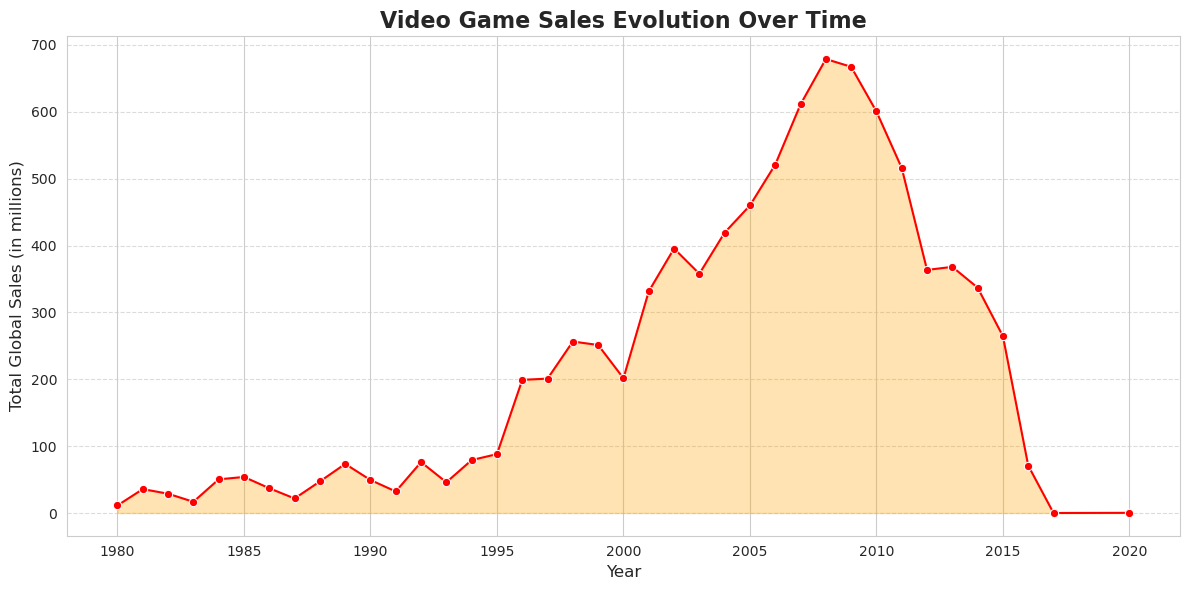

In [14]:
# Grouping the data by year and calculating the total global sales for each year
sales_by_year = data.groupby('Year')['Global_Sales'].sum()

# Creating a custom color palette for the plot
colors = sns.color_palette('rocket_r', len(sales_by_year))

# Plotting the sales trend over time with a creative and aesthetic look
plt.figure(figsize=(12, 6))
sns.lineplot(x=sales_by_year.index, y=sales_by_year.values, marker='o', color='red')
plt.fill_between(sales_by_year.index, sales_by_year.values, color='orange', alpha=0.3)
plt.title("Video Game Sales Evolution Over Time", fontsize=16, fontweight='bold')
plt.xlabel("Year", fontsize=12)
plt.ylabel("Total Global Sales (in millions)", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [15]:
# Grouping the data by year and finding the top platforms and genres for each year
top_platforms_by_year = data.groupby('Year')['Platform'].agg(lambda x: x.value_counts().index[0])
top_genres_by_year = data.groupby('Year')['Genre'].agg(lambda x: x.value_counts().index[0])

# Creating a DataFrame to store the results
dominant_platforms_genres = pd.DataFrame({'Top Platform': top_platforms_by_year, 'Top Genre': top_genres_by_year})
dominant_platforms_genres.reset_index(inplace=True)

# Displaying the dominant platforms and genres for each time period
print(dominant_platforms_genres)


      Year Top Platform     Top Genre
0   1980.0         2600          Misc
1   1981.0         2600        Action
2   1982.0         2600        Action
3   1983.0         2600        Action
4   1984.0          NES       Shooter
5   1985.0          NES      Platform
6   1986.0          NES        Action
7   1987.0          NES        Sports
8   1988.0          NES      Platform
9   1989.0           GB        Puzzle
10  1990.0          NES      Platform
11  1991.0         SNES        Sports
12  1992.0         SNES      Fighting
13  1993.0         SNES      Platform
14  1994.0         SNES      Fighting
15  1995.0           PS      Fighting
16  1996.0           PS        Sports
17  1997.0           PS        Sports
18  1998.0           PS        Sports
19  1999.0           PS        Sports
20  2000.0           PS        Sports
21  2001.0          PS2        Sports
22  2002.0          PS2        Sports
23  2003.0          PS2        Action
24  2004.0          PS2        Action
25  2005.0  